FIFO single-run stats: {'completed': 3294, 'mean_sojourn': 5.546372328055286, 'p50': 5.0281161955078915, 'p90': 10.124988739632387, 'p95': 11.806780573129481, 'mean_1': nan, 'mean_2': nan, 'mean_3': 5.546372328055286, 'throughput_per_time': 1.647924086086938}
completed: 32048 mean_sojourn: 6.141449581394681
MaxWeight single-run stats: {'completed': 3254, 'mean_sojourn': 5.4803745465582265, 'p50': 4.541020588001857, 'p90': 10.828194732319256, 'p95': 13.054289684590024, 'mean_1': nan, 'mean_2': nan, 'mean_3': 5.4803745465582265, 'throughput_per_time': 1.6270414607876529}


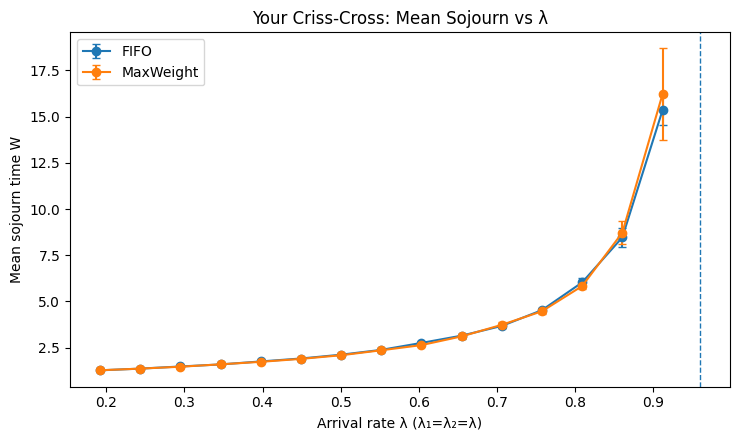

In [1]:
# main.py
import numpy as np
from NetworkClasses import CrissCross, FIFOPolicy, MaxWeightByQLenPolicy

def main():
    # --- single run: print stats ---
    fifo = FIFOPolicy()
    net = CrissCross(policy=fifo, seed=123, c1=1, c2=1, lam1=0.8, lam2=0.8, mu1=2.4, mu2=1.6, mu3=2.0)
    stats = net.run_warmup_and_measure(warmup_time=1_000.0, measure_time=2_000.0)
    print("FIFO single-run stats:", stats)
    # Swap policy
    maxw = MaxWeightByQLenPolicy()
    net2 = CrissCross(policy=maxw, seed=123, c1=1, c2=1, lam1=0.8, lam2=0.8, mu1=2.4, mu2=1.6, mu3=2.0)
    stats2 = net2.run_warmup_and_measure(warmup_time=1_000.0, measure_time=2_000.0)
    print("MaxWeight single-run stats:", stats2)

    # --- OPTIONAL: sweep + plot (λ1=λ2=λ) ---
    lam_star = CrissCross.lambda_star_symmetric(mu1=2.4, mu2=1.6, mu3=2.0, c1=1, c2=1)
    lam_grid = np.linspace(0.2*lam_star, 0.95*lam_star, 15)
    CrissCross.sweep_and_plot(
        policies=[("FIFO", fifo), ("MaxWeight", maxw)],
        lam_grid=lam_grid,
        reps=5, warmup_time=3000.0, measure_time= 20000.0,
        seed0=5, c1=1, c2=1, mu1=2.4, mu2=1.6, mu3=2.0,
        title="Your Criss-Cross: Mean Sojourn vs λ"
    )

if __name__ == "__main__":
    main()